In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
Z_100Tc=43
A_100Tc=100

Z_127Xe=54
A_127Xe=127

Z_76Ge=32
A_76Ge=76

Привиденная энергия вылетающего электрона: $\epsilon_e = \frac{E_{\nu}-Q_k}{m_e} + 1$

In [3]:
def e_e_func(E_nu, E_k, Q_EC):
    #Считаем привиденную энергию вылетающего электрона. Если энергия налетающего нейтрино E_nu
    #меньше порога, возвращаем 0 для обнуления итогового сечения
    #E_nu in MeV
    q=Q_k_func(E_k, Q_EC) #порог реакции
    if E_nu>q: return 1+(E_nu-q)/0.511
    else: return 0 

Привиденный импульс электрона: $\pi_e=\sqrt{\epsilon_e^2 -1}$

In [4]:
def Pi_e_func(e_e):
    #Привиденный импульс электрона, вычисляется через привиденную энергию; ** означает степень  
    return np.sqrt(e_e**2 - 1)

Ферми функция через гамму: $F(Z_f, E) = 2(\gamma_1+1)(2pR_{A})^{2(\gamma_1-1)}\frac{|\Gamma(\gamma_1+iy)|^2}{[\Gamma(2\gamma_1+1)]^2}e^{{\pi}y}$  
$y = \frac{{\alpha}Z_fE}{p}$, $\gamma_1 = \sqrt{1-(Z_f\alpha)^2}$, $R_A = 1.2A^{1/3}$ fm.  
E, p в единицах mc^2 и mc #см. начало Behrens and Janecki

In [5]:
def Fermi_via_Gamma(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    R = 1.2*np.cbrt(A)
    
    part1 = (2*gamma1+1)*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4

### Ферми функция из таблиц Суслова. Z - атомный номер исходного ядра

In [6]:
Suslov_Z31 = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=31.xls')
Suslov_Z42 = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=42.xls')
Suslov_Z53 = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=53.xls')
#Fermi_func.info()

def Suslov_func(e_e, Suslov_data):
    #input энергия электрона в кэв
    return np.interp(x = e_e, xp = Suslov_data['E_kev'], 
                     fp = Suslov_data['Value'])
def Suslov_func2(e_e, Suslov_data):
    #input энергия электрона в кэв
    cs = interp1d(Suslov_data['E_kev'], Suslov_data['Value'], kind='cubic')
    return cs(e_e)

In [7]:
Suslov_Z31.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E_kev   100 non-null    int64  
 1   Value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [8]:
e_e = np.linspace(5,10000, 1000) #энергия электрона в кэВ

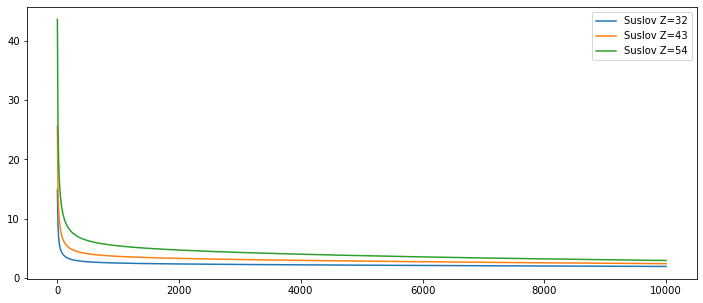

In [9]:
plt.figure(figsize=(12,5))
plt.plot(e_e, Suslov_func(e_e, Suslov_Z31), label='Suslov Z=32')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z42), label='Suslov Z=43')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), label='Suslov Z=54')
plt.legend()
plt.show()

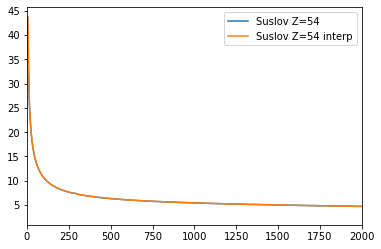

In [10]:
plt.plot(Suslov_Z53["E_kev"].values, Suslov_Z53["Value"].values, label='Suslov Z=54')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), label='Suslov Z=54 interp')
plt.xlim(0,2000)
plt.legend()
plt.show()

### Fermi-function from Numerical Tables for Beta-Decay and Electron Capture 
### Z и A даны для дочернего ядра

In [11]:
Janecki_Z32 = pd.read_excel('../../fermi_func_tables/from_1968/Janecki Z32.xls')
Janecki_Z43 = pd.read_excel('../../fermi_func_tables/from_1968/Janecki Z43.xls')
Janecki_Z54 = pd.read_excel('../../fermi_func_tables/from_1968/Janecki Z54.xls')
Janecki_Z32.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p0      48 non-null     float64
 1   Value   48 non-null     float64
dtypes: float64(2)
memory usage: 896.0 bytes


In [12]:
def Janecki_func(e_e, Janecki_data):
    #input энергия электрона в кэв
    E = 1 + e_e/511 # полная энергия электрона в единицах mc^2
    #E = e_e/511
    p = Pi_e_func(E)
    return np.interp(x = p, xp = Janecki_data['p0'], 
                     fp = Janecki_data['Value'])


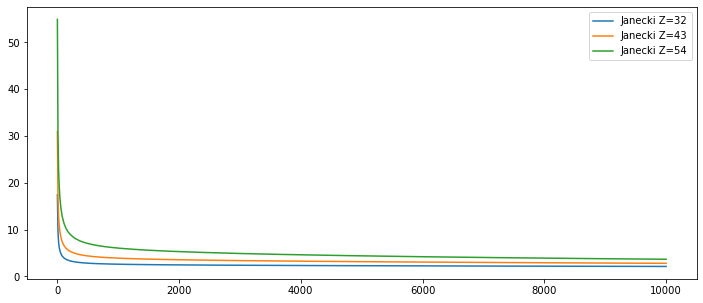

In [13]:
plt.figure(figsize=(12,5))
plt.plot(e_e, Janecki_func(e_e, Janecki_Z32), label='Janecki Z=32')
plt.plot(e_e, Janecki_func(e_e, Janecki_Z43), label='Janecki Z=43')
plt.plot(e_e, Janecki_func(e_e, Janecki_Z54), label='Janecki Z=54')
plt.legend()
plt.show()

In [14]:
Fermi_Semenov_Z54 = Fermi_via_Gamma(Z_127Xe, A_127Xe, e_e)
Fermi_Semenov_Z43 = Fermi_via_Gamma(Z_100Tc, A_100Tc, e_e)
Fermi_Semenov_Z32 = Fermi_via_Gamma(Z_76Ge, A_76Ge, e_e)

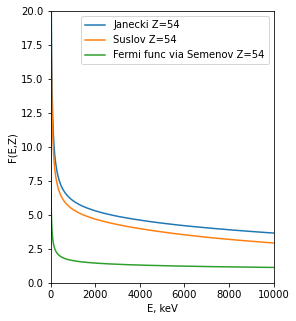

In [15]:
plt.figure(figsize=(4,5))
plt.plot(e_e, Janecki_func(e_e, Janecki_Z54), label='Janecki Z=54')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), label='Suslov Z=54')
plt.plot(e_e, Fermi_Semenov_Z54, label='Fermi func via Semenov Z=54')
plt.xlim(0,10000)
plt.ylim(0,20)
plt.xlabel("E, keV")
plt.ylabel("F(E,Z)")
plt.legend()
plt.show()

In [16]:
#from IPython.display import Image
#Image(filename='../../fermi_func_tables/janecki_z=54_err.jpg')

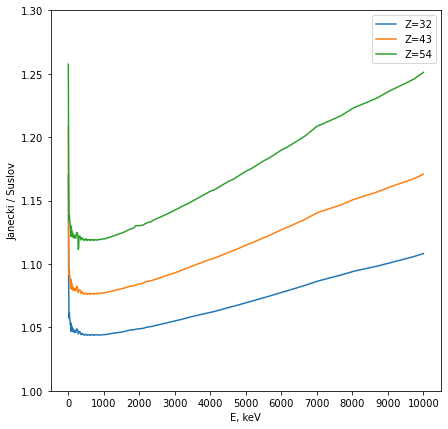

In [20]:
Z32 = Janecki_func(e_e, Janecki_Z32)/ Suslov_func(e_e, Suslov_Z31)
Z43 = Janecki_func(e_e, Janecki_Z43)/ Suslov_func(e_e, Suslov_Z42)
Z54 = Janecki_func(e_e, Janecki_Z54)/ Suslov_func(e_e, Suslov_Z53)

plt.figure(figsize=(7,7))
plt.plot(e_e, Z32, label='Z=32')
plt.plot(e_e, Z43, label='Z=43')
plt.plot(e_e, Z54, label='Z=54')
plt.legend()
#plt.xlim(300,2000)
plt.ylim(1,1.3)
plt.xlabel("E, keV")
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel("Janecki / Suslov")

#plt.savefig("Janecki_div_Suslov.png", format='png', transparent=False, dpi=500)

plt.show()

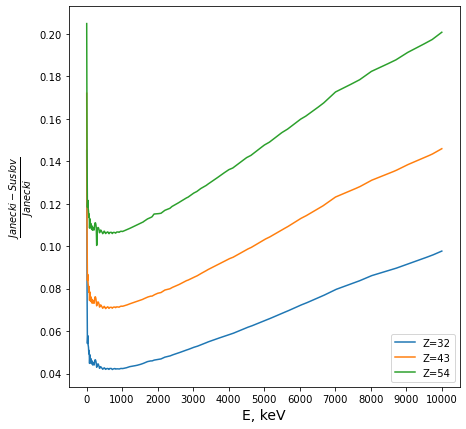

In [18]:
Z32 = ( Janecki_func(e_e, Janecki_Z32) - Suslov_func(e_e, Suslov_Z31) ) / Janecki_func(e_e, Janecki_Z32)
Z43 = ( Janecki_func(e_e, Janecki_Z43) - Suslov_func(e_e, Suslov_Z42) ) / Janecki_func(e_e, Janecki_Z43)
Z54 = ( Janecki_func(e_e, Janecki_Z54) - Suslov_func(e_e, Suslov_Z53) ) / Janecki_func(e_e, Janecki_Z54)

plt.figure(figsize=(7,7))
plt.plot(e_e, Z32, label='Z=32')
plt.plot(e_e, Z43, label='Z=43')
plt.plot(e_e, Z54, label='Z=54')
plt.legend()
#plt.xlim(300,2000)
#plt.ylim(1,1.5)
plt.xlabel("E, keV", fontsize=14)
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel(r'$\frac{Janecki - Suslov}{Janecki}$', fontsize=14)

#plt.savefig("Janecki_div_Suslov.png", format='png', transparent=False, dpi=500)

plt.show()

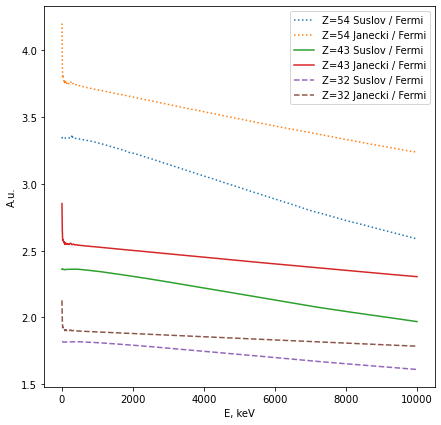

In [25]:
F_Suslov_Z43 =  Suslov_func(e_e, Suslov_Z42) / Fermi_Semenov_Z43 
F_Janecki_Z43 = Janecki_func(e_e, Janecki_Z43) / Fermi_Semenov_Z43 

F_Suslov_Z32 = Suslov_func(e_e, Suslov_Z31) / Fermi_Semenov_Z32
F_Janecki_Z32 = Janecki_func(e_e, Janecki_Z32) / Fermi_Semenov_Z32

F_Suslov_Z54 = Suslov_func(e_e, Suslov_Z53) / Fermi_Semenov_Z54
F_Janecki_Z54 = Janecki_func(e_e, Janecki_Z54) / Fermi_Semenov_Z54

plt.figure(figsize=(7,7))

plt.plot(e_e, F_Suslov_Z54, ls = ":", label='Z=54 Suslov / Fermi')
plt.plot(e_e, F_Janecki_Z54, ls = ":", label='Z=54 Janecki / Fermi')

plt.plot(e_e, F_Suslov_Z43, label='Z=43 Suslov / Fermi')
plt.plot(e_e, F_Janecki_Z43, label='Z=43 Janecki / Fermi')

plt.plot(e_e, F_Suslov_Z32, ls = "--", label='Z=32 Suslov / Fermi')
plt.plot(e_e, F_Janecki_Z32, ls = "--", label='Z=32 Janecki / Fermi')

plt.legend()
#plt.xlim(300,2000)
#plt.ylim(0,1)
#plt.xticks(np.arange(0,11000, 1000))
#plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("E, keV")
plt.ylabel("A.u.")

#plt.savefig("Fermi_div_others.png", format='png', transparent=False, dpi=500)

plt.show()